Question 1: 
a/
Gradient of (0,0) according to x and y: 16 8
Gradient of (1,1) according to x and y: 1 -9
Gradient of (0,3) according to x and y: -3 -5
b/
Normalized Histogram of I1: 
[0.08 0.28 0.16 0.08 0.08 0.16 0.04 0.12]
c/
I2: 
[[0 0 0 0 0]
 [0 0 0 0 0]
 [7 0 0 0 0]
 [7 0 0 0 0]
 [7 0 0 0 0]]
Histogram of I2: 


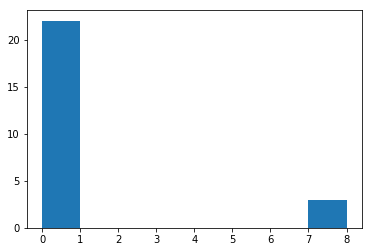

Question 2: 
a/
Based vectors after DFT: 
e0: [1.+0.j 1.+0.j]
e1: [ 1.+0.j -1.-0.j]
b/
Based vectors after DCT for 4 dims: 
e0: [0.5 0.5 0.5 0.5]
e1: [ 0.65328148  0.27059805 -0.27059805 -0.65328148]
e2: [ 0.5 -0.5 -0.5  0.5]
e3: [ 0.27059805 -0.65328148  0.65328148 -0.27059805]
W_dct.dot(W_dct.T): 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
W is orthor
dct of fx: [4. 0. 2.]
Question 3: 
a/
Translate -3: 
[[ 1  0 -3]
 [ 0  1 -3]
 [ 0  0  1]]
Rotate : 
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
Translate 3: 
[[1 0 3]
 [0 1 3]
 [0 0 1]]
Matrix to rotate the image around (3,3): 
 [[ 0.70710678 -0.70710678  3.        ]
 [ 0.70710678  0.70710678 -1.24264069]
 [ 0.          0.          1.        ]]
b/
x, y after zero order: 2,4


In [84]:
import numpy as np
from scipy import signal
from scipy import fftpack
import matplotlib.pyplot as plt 


print("Question 1: ")
### Question 1
print("a/")
##a 

I1 = np.array([
    [5,0,0,1,2],
    [2,1,5,1,2],
    [7,1,5,1,2],
    [7,4,5,4,3],
    [7,1,6,1,3]
])


H_sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
H_sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

grad_x = signal.convolve2d(I1,H_sobel_x,boundary='symm',mode ='same')
grad_y = signal.convolve2d(I1,H_sobel_y,boundary='symm',mode = 'same')


print(f"Gradient of (0,0) according to x and y: {grad_x[0,0]} {grad_y[0,0]}")
print(f"Gradient of (1,1) according to x and y: {grad_x[1,1]} {grad_y[1,1]}")
print(f"Gradient of (0,3) according to x and y: {grad_x[0,3]} {grad_y[0,3]}")

##b
print("b/")
n = I1.size
hist1 = np.bincount(I1.flatten())/n
print("Normalized Histogram of I1: ")
print(hist1)

##c
print("c/")
hist2 = np.array([1/8 for i in range(8)])
cdf1 = np.cumsum(hist1)
cdf2 = np.cumsum(hist2)

## equalize 
print("I2: ")
I2 = np.zeros((N,N))
N = I1.shape[0]
for i in range(N):
  for j in range(N):
    x = I1[i,j]
    c_x = cdf1[x]
    for k in range(len(cdf2)):
      if cdf2[k] == c_x:
        I2[i,j] = k
        
print(I2.astype(np.int))

print("Histogram of I2: ")
plt.hist(I2.flatten(),8,[0,8])
plt.show()

    
### Question 2 
print("Question 2: ")
#a
print("a/")
f = np.array([1,2])

A = np.arange(2).reshape((1,2))

M = A.reshape((2,1)).dot(A)

M_dft = np.round(np.exp(1)**(-2j*(np.pi/2)*M))

print("Based vectors after DFT: ")
i=0
for e in M_dft:
  print(f"e{i}: {e}")
  i+=1
  
#b 
print("b/")
M = 4
u = np.arange(M).reshape((M,1))
x = 2*u+1
W_dct = np.dot(u,x.T)
W_dct = np.cos(np.pi*W_dct/(2*M))
for _ in range(M):
  if _ == 0:
    W_dct[_,:]*= np.sqrt(1/M)
  else:
    W_dct[_,:]*= np.sqrt(2/M)

print("Based vectors after DCT for 4 dims: ")
i=0
for e in W_dct:
  print(f"e{i}: {e}")
  i+=1
  
IW = np.round(W_dct.dot(W_dct.T)).astype(np.int32)
print(f"W_dct.dot(W_dct.T): \n {IW}")

if(np.array_equal(IW,np.eye(4))):
  print("W is orthor")


fx = np.array([1,0,1])

fx_dct = fftpack.dct(fx)

print(f"dct of fx: {fx_dct}")

### Question 3:

print("Question 3: ")
print("a/")
phi = np.pi/4
H2 = np.array([[np.cos(phi),-np.sin(phi),0],[np.sin(phi),np.cos(phi),0],[0,0,1]])
H1 = np.array([[1,0,-3],[0,1,-3],[0,0,1]])
H3 = np.array([[1,0,3],[0,1,3],[0,0,1]])

print(f"Translate -3: \n{H1}")
print(f"Rotate : \n {H2}")
print(f"Translate 3: \n{H3}")
H = H3.dot(H2).dot(H1)

print(f"Matrix to rotate the image around (3,3): \n {H}")

print("b/")

Io = np.array((2,3,1)).reshape((3,1))
I = np.linalg.pinv(H).dot(Io)

x,y=I[0:2,:].flatten()
print(f"x, y after zero order: {np.round(x).astype(np.int32)},{np.round(y).astype(np.int32)}")

